In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))
generated_targets  = 2 * xs - 3 * zs + 5 + noise
np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs =100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 30.0233 - 180ms/epoch - 6ms/step
Epoch 2/100
32/32 - 0s - loss: 4.6032 - 21ms/epoch - 656us/step
Epoch 3/100
32/32 - 0s - loss: 1.5581 - 20ms/epoch - 625us/step
Epoch 4/100
32/32 - 0s - loss: 0.6678 - 20ms/epoch - 625us/step
Epoch 5/100
32/32 - 0s - loss: 0.4434 - 31ms/epoch - 954us/step
Epoch 6/100
32/32 - 0s - loss: 0.3707 - 21ms/epoch - 656us/step
Epoch 7/100
32/32 - 0s - loss: 0.3585 - 20ms/epoch - 630us/step
Epoch 8/100
32/32 - 0s - loss: 0.3522 - 20ms/epoch - 625us/step
Epoch 9/100
32/32 - 0s - loss: 0.3522 - 20ms/epoch - 630us/step
Epoch 10/100
32/32 - 0s - loss: 0.3542 - 19ms/epoch - 585us/step
Epoch 11/100
32/32 - 0s - loss: 0.3508 - 19ms/epoch - 592us/step
Epoch 12/100
32/32 - 0s - loss: 0.3528 - 20ms/epoch - 624us/step
Epoch 13/100
32/32 - 0s - loss: 0.3528 - 22ms/epoch - 672us/step
Epoch 14/100
32/32 - 0s - loss: 0.3533 - 19ms/epoch - 600us/step
Epoch 15/100
32/32 - 0s - loss: 0.3520 - 21ms/epoch - 645us/step
Epoch 16/100
32/32 - 0s - loss: 0.

In [5]:
model.layers[0].get_weights()

[array([[ 1.9970928],
        [-3.016591 ]], dtype=float32),
 array([5.0113096], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9970928],
       [-3.016591 ]], dtype=float32)

In [7]:
biases = model.layers[0].get_weights()[1]
biases

array([5.0113096], dtype=float32)

In [8]:
model.predict_on_batch(training_data['inputs'])

array([[ 1.25075960e+01],
       [ 3.29989014e+01],
       [-1.23924398e+01],
       [ 2.60025826e+01],
       [ 9.13393021e+00],
       [ 2.28944969e+01],
       [ 8.87651348e+00],
       [ 2.68585396e+00],
       [-2.36777687e+01],
       [ 6.07257843e-01],
       [-2.33340416e+01],
       [ 2.69571991e+01],
       [-9.87807751e+00],
       [-6.08574772e+00],
       [ 2.31749916e+01],
       [-4.19171047e+00],
       [ 1.48884764e+01],
       [-3.48659229e+00],
       [ 1.43552914e+01],
       [ 1.96633415e+01],
       [-2.44903660e+00],
       [ 2.97717552e+01],
       [ 1.41751652e+01],
       [-8.40749741e-01],
       [ 2.68534317e+01],
       [-1.07279320e+01],
       [-2.71253548e+01],
       [ 3.33907242e+01],
       [-9.21966648e+00],
       [-1.04968081e+01],
       [-9.54383755e+00],
       [-5.31786251e+00],
       [ 1.90715408e+01],
       [ 1.26741810e+01],
       [ 2.33821678e+00],
       [-1.03514147e+01],
       [-1.14318686e+01],
       [ 2.74339294e+01],
       [ 3.2

In [9]:
training_data['targets'].round(1)

array([[ 12.4],
       [ 32.9],
       [-11.9],
       [ 25.1],
       [  8.5],
       [ 22.6],
       [  9.1],
       [  3.5],
       [-24.4],
       [ -0.1],
       [-23.9],
       [ 26.4],
       [ -9.1],
       [ -6. ],
       [ 23.3],
       [ -5. ],
       [ 15.3],
       [ -4. ],
       [ 14.2],
       [ 20.3],
       [ -2.6],
       [ 28.8],
       [ 15.1],
       [ -0.5],
       [ 26.5],
       [-11.2],
       [-27.8],
       [ 33.7],
       [ -9.3],
       [-10.5],
       [-10.3],
       [ -4.4],
       [ 19.2],
       [ 12.3],
       [  2.7],
       [-10.7],
       [-12.1],
       [ 27.1],
       [ 33.2],
       [-38.2],
       [ 21.7],
       [ 18.6],
       [ -9. ],
       [  5.4],
       [-11. ],
       [ 25.6],
       [-27.1],
       [ -9.7],
       [-18.3],
       [ 19.1],
       [  3.9],
       [  5.8],
       [ -8.9],
       [-14.5],
       [-27.2],
       [ -2.6],
       [ 24.9],
       [  8.4],
       [ -5.1],
       [-20.1],
       [-24.2],
       [ 27.7],
       [

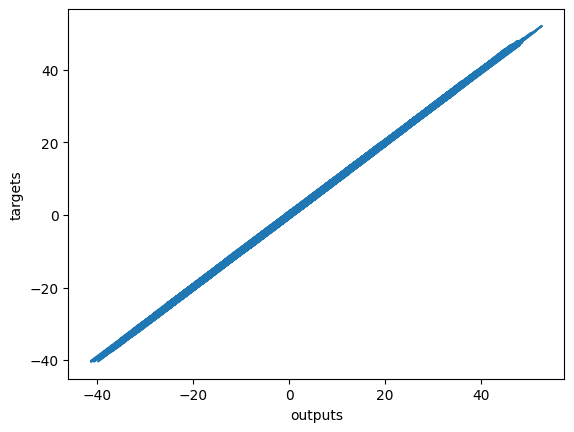

In [20]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets'].round(1)))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()